In [121]:
import xarray as xr
import xesmf as xe
import numpy as np 
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors


import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

In [6]:
ds1 = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/250m_ModelRuns/model_outputs/ishmael_mp55_wy2019.nc")

In [5]:
ds2 = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/250m_ModelRuns/model_outputs/model_out2.nc")

<xarray.Dataset>
Dimensions:         (reference_time: 1, snow_layers: 3, soil_layers_stag: 4, time: 365, vis_nir: 2, x: 179, y: 239)
Coordinates:
  * time            (time) datetime64[ns] 2018-10-01 2018-10-02 ... 2019-09-30
  * reference_time  (reference_time) datetime64[ns] 2018-10-01
  * x               (x) float64 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03
  * y               (y) float64 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03
Dimensions without coordinates: snow_layers, soil_layers_stag, vis_nir
Data variables:
    crs             |S1 b''
    IVGTYP          (time, y, x) float64 ...
    ISLTYP          (time, y, x) float64 ...
    FVEG            (time, y, x) float64 ...
    LAI             (time, y, x) float64 ...
    SAI             (time, y, x) float64 ...
    SWFORC          (time, y, x) float64 ...
    COSZ            (time, y, x) float64 ...
    LWFORC          (time, y, x) float64 ...
    RAINRATE        (time, y, x) float64 ...
    EMISS           (time, y, x) float64 ...
    FSA             (time, y, x) float64 ...
    FIRA            (time, y, x) float64 ...
    GRDFLX          (time, y, x) float64 ...
    HFX             (time, y, x) float64 ...
    LH              (time, y, x) float64 ...
    ECAN            (time, y, x) float64 ...
    EDIR            (time, y, x) float64 ...
    ALBEDO          (time, y, x) float64 ...
    ETRAN           (time, y, x) float64 ...
    UGDRNOFF        (time, y, x) float64 ...
    SFCRNOFF        (time, y, x) float64 ...
    CANLIQ          (time, y, x) float64 ...
    CANICE          (time, y, x) float64 ...
    ZWT             (time, y, x) float64 ...
    WA              (time, y, x) float64 ...
    WT              (time, y, x) float64 ...
    ACCPRCP         (time, y, x) float64 ...
    ACCECAN         (time, y, x) float64 ...
    ACCEDIR         (time, y, x) float64 ...
    ACCETRAN        (time, y, x) float64 ...
    SAV             (time, y, x) float64 ...
    TR              (time, y, x) float64 ...
    EVC             (time, y, x) float64 ...
    IRC             (time, y, x) float64 ...
    SHC             (time, y, x) float64 ...
    IRG             (time, y, x) float64 ...
    SHG             (time, y, x) float64 ...
    EVG             (time, y, x) float64 ...
    GHV             (time, y, x) float64 ...
    SAG             (time, y, x) float64 ...
    IRB             (time, y, x) float64 ...
    SHB             (time, y, x) float64 ...
    EVB             (time, y, x) float64 ...
    GHB             (time, y, x) float64 ...
    TRAD            (time, y, x) float64 ...
    TG              (time, y, x) float64 ...
    TV              (time, y, x) float64 ...
    TAH             (time, y, x) float64 ...
    TGV             (time, y, x) float64 ...
    TGB             (time, y, x) float64 ...
    T2MV            (time, y, x) float64 ...
    T2MB            (time, y, x) float64 ...
    Q2MV            (time, y, x) float64 ...
    Q2MB            (time, y, x) float64 ...
    EAH             (time, y, x) float64 ...
    FWET            (time, y, x) float64 ...
    ZSNSO_SN        (time, y, snow_layers, x) float64 ...
    SNICE           (time, y, snow_layers, x) float64 ...
    SNLIQ           (time, y, snow_layers, x) float64 ...
    SOIL_T          (time, y, soil_layers_stag, x) float64 ...
    SOIL_W          (time, y, soil_layers_stag, x) float64 ...
    SNOW_T          (time, y, snow_layers, x) float64 ...
    SOIL_M          (time, y, soil_layers_stag, x) float64 ...
    SNOWH           (time, y, x) float64 ...
    SNEQV           (time, y, x) float64 ...
    QSNOW           (time, y, x) float64 ...
    ISNOW           (time, y, x) float64 ...
    FSNO            (time, y, x) float64 ...
    ACSNOW          (time, y, x) float64 ...
    ACSNOM          (time, y, x) float64 ...
    CM              (time, y, x) float64 ...
    CH              (time, y, x) float64 ...
    CHV             (time, y, x) float64 ...
    CHB             (time, y, x) float64 ...
 

In [125]:
geog = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/geo_em_updatedDEM.d01.nc")

In [126]:
geog

<xarray.Dataset>
Dimensions:     (Time: 1, dust_erosion_dimension: 3, land_cat: 21, month: 12, num_urb_params: 132, soil_cat: 16, south_north: 239, south_north_stag: 240, west_east: 179, west_east_stag: 180)
Dimensions without coordinates: Time, dust_erosion_dimension, land_cat, month, num_urb_params, soil_cat, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times       (Time) |S19 ...
    XLAT_M      (Time, south_north, west_east) float32 ...
    XLONG_M     (Time, south_north, west_east) float32 ...
    XLAT_V      (Time, south_north_stag, west_east) float32 ...
    XLONG_V     (Time, south_north_stag, west_east) float32 ...
    XLAT_U      (Time, south_north, west_east_stag) float32 ...
    XLONG_U     (Time, south_north, west_east_stag) float32 ...
    CLAT        (Time, south_north, west_east) float32 ...
    CLONG       (Time, south_north, west_east) float32 ...
    MAPFAC_M    (Time, south_north, west_east) float32 ...
    MAPFAC_V    (Time, south_north_stag, west_east) float32 ...
    MAPFAC_U    (Time, south_north, west_east_stag) float32 ...
    MAPFAC_MX   (Time, south_north, west_east) float32 ...
    MAPFAC_VX   (Time, south_north_stag, west_east) float32 ...
    MAPFAC_UX   (Time, south_north, west_east_stag) float32 ...
    MAPFAC_MY   (Time, south_north, west_east) float32 ...
    MAPFAC_VY   (Time, south_north_stag, west_east) float32 ...
    MAPFAC_UY   (Time, south_north, west_east_stag) float32 ...
    E           (Time, south_north, west_east) float32 ...
    F           (Time, south_north, west_east) float32 ...
    SINALPHA    (Time, south_north, west_east) float32 ...
    COSALPHA    (Time, south_north, west_east) float32 ...
    LANDMASK    (Time, south_north, west_east) float32 ...
    XLAT_C      (Time, south_north_stag, west_east_stag) float32 ...
    XLONG_C     (Time, south_north_stag, west_east_stag) float32 ...
    SINALPHA_U  (Time, south_north, west_east_stag) float32 ...
    COSALPHA_U  (Time, south_north, west_east_stag) float32 ...
    SINALPHA_V  (Time, south_north_stag, west_east) float32 ...
    COSALPHA_V  (Time, south_north_stag, west_east) float32 ...
    LANDUSEF    (Time, land_cat, south_north, west_east) float32 ...
    LU_INDEX    (Time, south_north, west_east) float32 ...
    HGT_M       (Time, south_north, west_east) float32 ...
    SOILTEMP    (Time, south_north, west_east) float32 ...
    SOILCTOP    (Time, soil_cat, south_north, west_east) float32 ...
    SCT_DOM     (Time, south_north, west_east) float32 ...
    SOILCBOT    (Time, soil_cat, south_north, west_east) float32 ...
    SCB_DOM     (Time, south_north, west_east) float32 ...
    ALBEDO12M   (Time, month, south_north, west_east) float32 ...
    GREENFRAC   (Time, month, south_north, west_east) float32 ...
    LAI12M      (Time, month, south_north, west_east) float32 ...
    SNOALB      (Time, south_north, west_east) float32 ...
    CON         (Time, south_north, west_east) float32 ...
    VAR         (Time, south_north, west_east) float32 ...
    OA1         (Time, south_north, west_east) float32 ...
    OA2         (Time, south_north, west_east) float32 ...
    OA3         (Time, south_north, west_east) float32 ...
    OA4         (Time, south_north, west_east) float32 ...
    OL1         (Time, south_north, west_east) float32 ...
    OL2         (Time, south_north, west_east) float32 ...
    OL3         (Time, south_north, west_east) float32 ...
    OL4         (Time, south_north, west_east) float32 ...
    VAR_SSO     (Time, south_north, west_east) float32 ...
    LAKE_DEPTH  (Time, south_north, west_east) float32 ...
    URB_PARAM   (Time, num_urb_params, south_north, west_east) float32 ...
    IMPERV      (Time, south_north, west_east) float32 ...
    CANFRA      (Time, south_north, west_east) float32 ...
    EROD        (Time, dust_erosion_dimension, south_north, west_east) float32 ...
    CLAYFRAC    (Time, south_north, west_east) float32 ...
    SANDFRAC    (Time, south_north, we

In [19]:
#dshr_dep = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/snowdepths//og_grid/ASO_SD_20190407_latlon.nc")


In [27]:
dslr_dep = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/snowdepths/og_grid/ASO_SD_250m_bilin_20190407_latlon.nc")


In [29]:
asorg = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swe_regrid_250m_ASO_250M_SWE_bilin_20180331_latlon.nc")

In [53]:
asorg.coords

Coordinates:
    lon      (south_north, west_east) float32 -107.18211 ... -106.66795
    lat      (south_north, west_east) float32 38.61014 38.610146 ... 39.145313

In [40]:
#newdds = asorg.copy()
asorg

<xarray.Dataset>
Dimensions:  (south_north: 239, west_east: 179)
Coordinates:
    lon      (south_north, west_east) float32 -107.18211 ... -106.66795
    lat      (south_north, west_east) float32 38.61014 38.610146 ... 39.145313
Dimensions without coordinates: south_north, west_east
Data variables:
    Band1    (south_north, west_east) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [114]:
sub = ds2[["SNEQV", "SWFORC", "LWFORC", "RAINRATE", "ACCPRCP", "ACCECAN", "ACCEDIR", "LH", "ACSNOW", "ACSNOM", "SNOWH", "SNEQV"]]
sub = sub.assign_coords(asorg.coords)
sub = sub.swap_dims({"y":"south_north", "x":"west_east"})
sub = sub.drop(["x","y"])

In [135]:
#sub['EAST_MASK'] = geog['EAST_MASK'].rename({"Time":"time"})

In [134]:
#geog['EAST_MASK'].rename({"Time":"time"}).expand_dims(365)

/home/wrudisill/miniconda3/envs/wrfplotenv/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


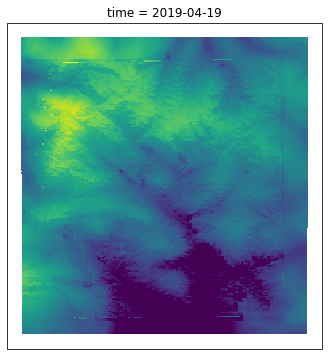

In [124]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
sub.SNEQV.isel(time=200).plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="lon", y="lat", add_colorbar=False
)
#ax.coastlines()
#ax.set_ylim([0, 90]);
